In [80]:
import numpy as np
import matplotlib.pyplot as plt

In [81]:
def distort_image(im, prop):
    if prop < 0 or prop > 1:
        print("Out-of-bound proportion: going to default 0.05")
        prop = 0.05  # Default

    imd = im
    indx = np.random.permutation(len(imd.ravel()))
    todist = indx[:round(len(indx) * prop)]
    imd.flat[todist] = -imd.flat[todist]

    return imd

# This function takes an input image im and a distortion proportion prop.
# If the proportion is out of the valid range (0 to 1), it sets a default value of 0.05.
# It then randomly selects a subset of the image elements based on the proportion and negates their values.

def distort_vector(p,d):
        if d < 0 or d > 1:
            print("Out-of-bound proportion: going to default 0.05")
            d = 0.05  # Default

        pd = p
        indx = np.random.permutation(len(pd))
        todist = indx[:round(len(indx) * d)]
        pd[todist] = -pd[todist]

        return pd


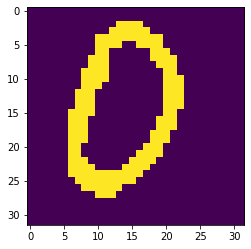

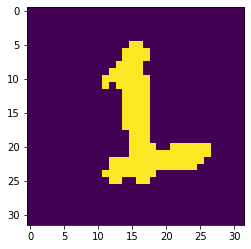

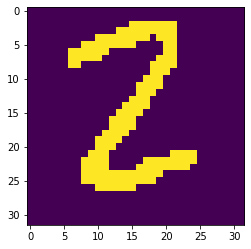

In [82]:
p0 = np.loadtxt('../Lab2_2/lab2_2_data/p0.csv')
p1 = np.loadtxt('../Lab2_2/lab2_2_data/p1.csv')
p2 = np.loadtxt('../Lab2_2/lab2_2_data/p2.csv')

im0 = np.transpose(np.reshape(p0, (32, 32)))
im1 = np.transpose(np.reshape(p1, (32, 32)))
im2 = np.transpose(np.reshape(p2, (32, 32)))

plt.imshow(im0)
plt.show()
plt.imshow(im1)
plt.show()
plt.imshow(im2)
plt.show()

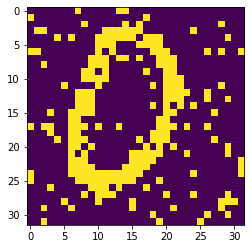

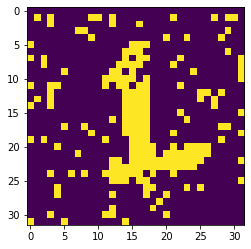

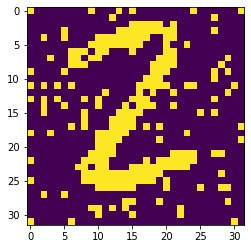

In [83]:
im0d = distort_image(im0, 0.1)
im1d = distort_image(im1, 0.1)
im2d = distort_image(im2, 0.1)

plt.imshow(im0)
plt.show()
plt.imshow(im1)
plt.show()
plt.imshow(im2)
plt.show()

# Storage Phase (learning)

In [87]:
def learning(p):
    N = len(p)
    w = (1/N)*np.outer(p,p) #va bene??
    np.fill_diagonal(w, 0)
    return w

In [88]:
w = learning(p0)
print(w)

[[ 0.         -0.00097656  0.00097656 ...  0.00097656  0.00097656
   0.00097656]
 [-0.00097656  0.         -0.00097656 ... -0.00097656 -0.00097656
  -0.00097656]
 [ 0.00097656 -0.00097656  0.         ...  0.00097656  0.00097656
   0.00097656]
 ...
 [ 0.00097656 -0.00097656  0.00097656 ...  0.          0.00097656
   0.00097656]
 [ 0.00097656 -0.00097656  0.00097656 ...  0.00097656  0.
   0.00097656]
 [ 0.00097656 -0.00097656  0.00097656 ...  0.00097656  0.00097656
   0.        ]]


# Retrieval Phase